# 🐶 End-to-end Multi-class Dog Breed Classification 

This notebook builds an End-toEnd multi_class image classifier using TensorFlow 2.0 and TenserFlow Hub. 

## 1. Problem 

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and i take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition. 

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation 

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features 

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels)
* There are arroun 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [ ]:
# Unzip the uploaded data into Google Drive
#!unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

### Get our workspace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅

In [ ]:
# Import necessart tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub vercion:", hub.__version__)

# Check for GPU availability
print("GPU", "available(YES!)" if tf.config.list_logical_devices("GPU") else "not available :(")

TF version: 2.7.0
TF Hub vercion: 0.12.0
GPU available(YES!)


## Getting our data ready (Turning into Tensors)

With all machine learning meodels, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (Numerical representation)

Let's start by accessing our data and cheching out the labels. 

In [ ]:
# Checkout the labels of our data 
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     58bc6a921d165bbf910e815924652daf  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


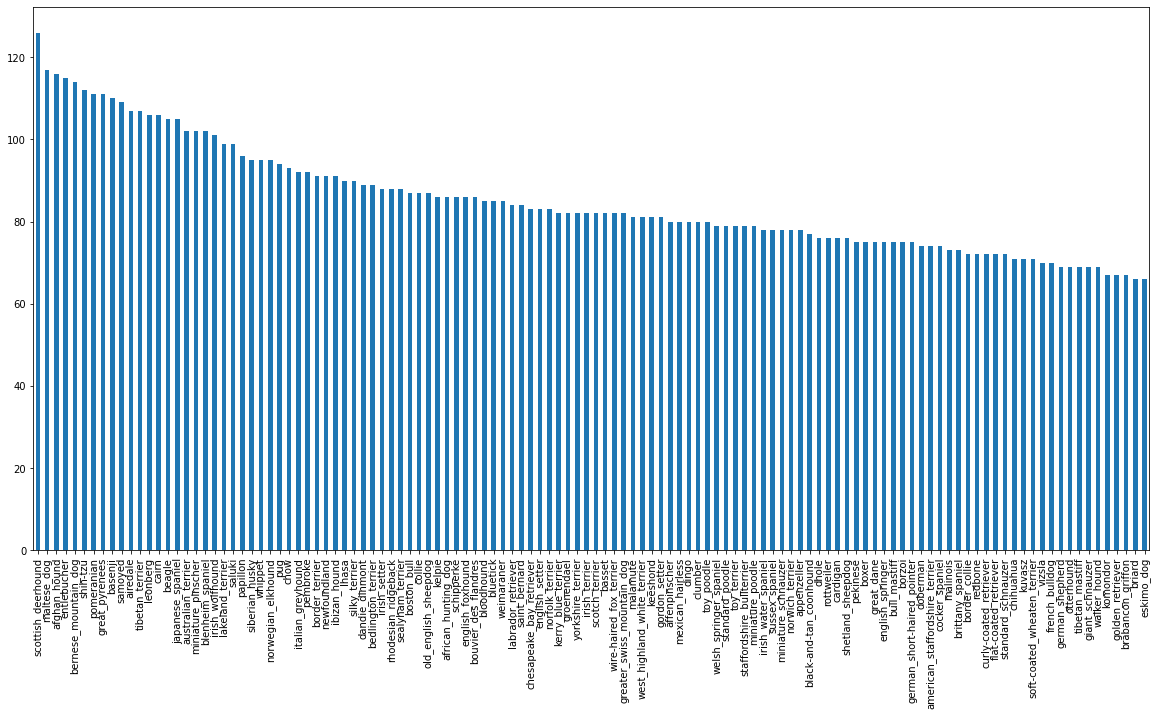

In [ ]:
# How many images are there of each bread?
labels_csv["breed"].value_counts().plot.bar(figsize = (20, 10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

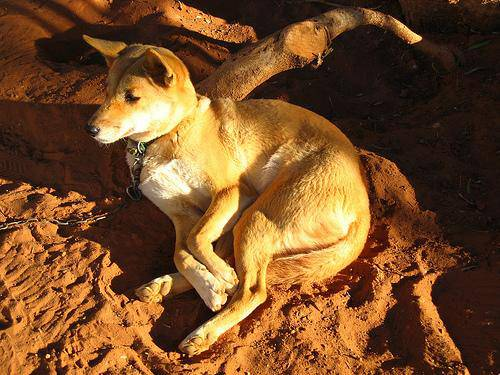

In [ ]:
# Let's view a image 
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and therir labels

Let's get a list of all of our images file pathnames 

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/Dog Vision/train/"+ fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os 
if len(os.listdir("drive/My Drive/Dog Vision/train")) == len(filenames):
  print("Filenames match actual amount of files! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files! Proceed.


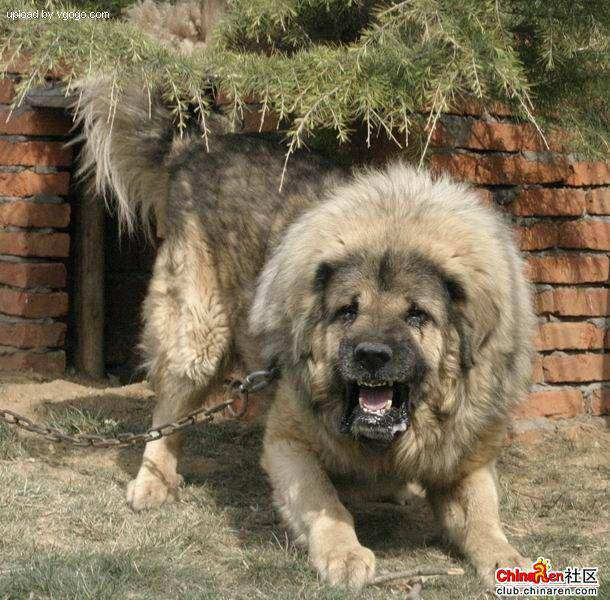

In [ ]:
# One more check 
Image(filenames[9000])

In [ ]:
 labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels 

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # Does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames 
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not matches number of filenames, check data directories!")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values 
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans 
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array 
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: Turning boolean arrat into integres 
print(labels[0]) # Original label 
print(np.where(unique_breeds == labels[0])) # index where lable occcurs
print(boolean_labels[0].argmax())# index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample lable occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set 
Since the dataset from Kaggle doesn't came with a validation set, we're going to create our own.

In [ ]:
# Setup X & y variables 
X = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increase as needed. 

In [ ]:
# Set number of images to use for experimenting 
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, steps:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split 

# Split them into train and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.2, random_state = 42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing Images (turning images into Tensor)

To preprocess our images into Tensor  we're going to write a function witch does a few things:
1. Take an image filepath as input 
2. Use TensorFlow to read the file and save to it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`

Before we do, let's see what importing an image looks like.

In [ ]:
# Convert image to Numpy array 
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them. 

1. Take an image filepath as input 
2. Use TensorFlow to read the file and save to it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a funcion for preprocessing images 
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file 
  image = tf.io.read_file(image_path)
  # Turn the jpeg into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values 
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to ur desired value (244, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches 

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory. 

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the bath size if need be).

In order to use Tensorflow effectively, we need our data in form of Tensor tuples which look like this:
`(image, label)`

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label, processes the image and returns a tuple of (image, label).
  """
  image =process_image(image_path)
  return image, label

In [ ]:
# Demo of the above 
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, Label)`, let's make a function to turn all of our data `(X & y)` into batches!

In [ ]:
# Define the batch size, 32 is a good start 
BATCH_SIZE = 32 

# Create a function to turn data into batches 
def create_data_batches(x, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Create batches of data out of image (X) and label (y) pairs. Shuffles the data if it's training data but doesn't shuffle if it's v alidation data. 
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probablty don't have labels 
  if test_data: 
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Only filepath (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it 
  elif valid_data:
    print("Cretaing validation data batches...")
    data =  tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y))) # Filepath, labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating training data batches...")
    # Turn filepath and labels into Tensors 
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    # Shuffling pathnamens and labels before mapping image processor functiopn in faster than shuffling images 
    data = data.shuffle(buffer_size = len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image )
    data = data.map(get_image_label)

    # Turn the training data into batches 
    data_batch = data.batch(BATCH_SIZE)

  return data_batch



In [ ]:
# Create training and validation  data batches 
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Cretaing validation data batches...


In [ ]:
# Check out the different attributes of our data batches 
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!


In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure 
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1) 
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title 
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

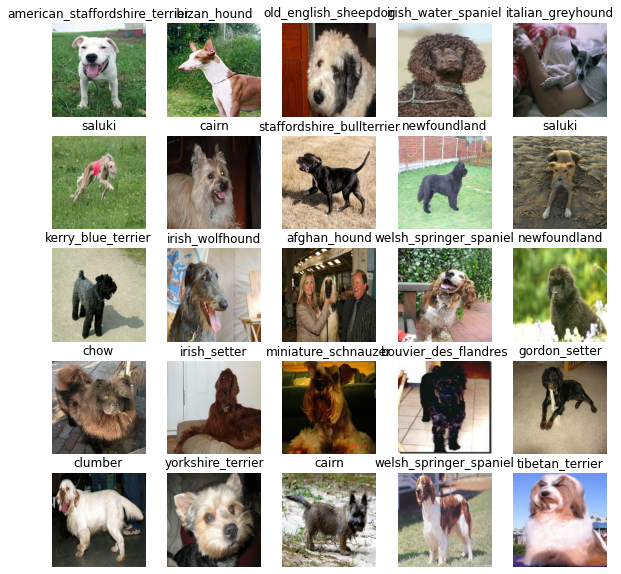

In [ ]:
# Now let's visualize the data in a training bath
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

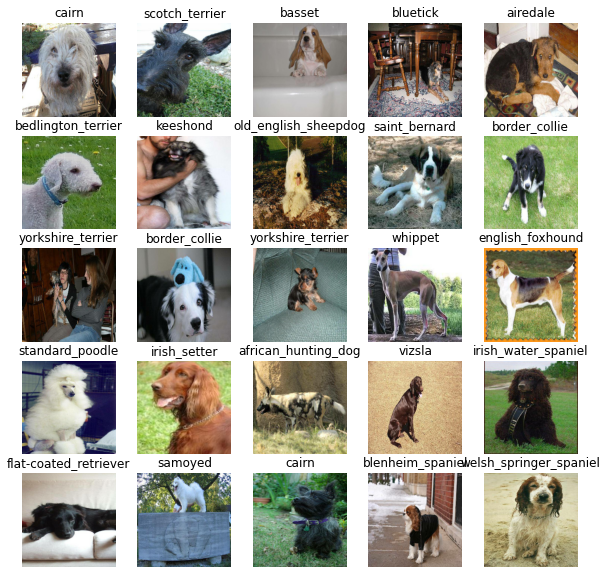

In [ ]:
# Now let's visualize our validation set 
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model 

Before we build a model, there are a few things we need to define: 
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [ ]:
# Setup input shape to the model 
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # bath, height, width, colour channels 

# Setup output shape of our model 
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from  TenserFlow Hub 
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the mdoel we've chosean as parameters.
* Define the layers in a Keras model in sequencial fashion (do this first, then this, then that). 
* Compiles the model (says it should be evaluated and improved).
* Build the model (tells the model the input shape it'll be getting)
* Returns the model. 

All of these steps can be found here: https://www.tensorflow.org/guide/keras/sequential_model
 


In [ ]:
# Create a function which builds a Keras model 
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL), # Layer 1(input layer) 
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") # Layer 2 (output layer)
                               ])
  
  # Compile the model 
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"]
                 )
   
  # Build the model 
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
outputs = np.ones(shape=(1, 1, 1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save it progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long. 

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook entension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function. ✅
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training)

In [ ]:
# Load TensorBoard notebook extension 
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stoping training if a certain evaluation metric stop improving

In [ ]:
# Create early stopping callback 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a mode (on subset of data)

Our first model is only going to train on 1000 images, to make sure ecerything is working. 

In [ ]:
 NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Check to make sure ee're still running on a GPU 
print("GPU", "available (Yes!)" if tf.config.list_physical_devices("GPU") else "Not avaliable :(")

GPU available (Yes!)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHES`) and the callbacks we'd like to use 
* Return the model 

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data 
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 335s 4s/step - loss: 4.4907 - accuracy: 0.1025 - val_loss: 3.3190 - val_accuracy: 0.2850
Epoch 2/100
25/25 [==============================] - 6s 232ms/step - loss: 1.5925 - accuracy: 0.6825 - val_loss: 2.1401 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 5s 203ms/step - loss: 0.5530 - accuracy: 0.9413 - val_loss: 1.6925 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 5s 208ms/step - loss: 0.2442 - accuracy: 0.9900 - val_loss: 1.5089 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 5s 187ms/step - loss: 0.1468 - accuracy: 0.9975 - val_loss: 1.4401 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 5s 204ms/step - loss: 0.0996 - accuracy: 1.0000 - val_loss: 1.3937 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================]

**Question:** It looks like our model is overfitting because it's performing far better on the training dataset than the validation sets, what are some ways to prevent model overfitting in deep learning neutral networks?

**Note:** Overfitting to begin with is a good thing! It means our model is learning!

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will acces the logs directory we create erlier and visualize its conten.

In [ ]:
%tensorboard --logdir '/content/drive/MyDrive/Dog Vision/logs'

<IPython.core.display.Javascript object>

In [ ]:
tensorboard --inspect --logdir '/content/drive/MyDrive/Dog Vision/logs'

ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stdout:
Processing event files... (this can take a few minutes)

Found event files in:
/content/drive/MyDrive/Dog Vision/logs/20220102-132708/train
/content/drive/MyDrive/Dog Vision/logs/20220102-132708/validation
/content/drive/MyDrive/Dog Vision/logs/20220102-140815/train
/content/drive/MyDrive/Dog Vision/logs/20220102-140815/validation
/content/drive/MyDrive/Dog Vision/logs/20220102-154249/train
/content/drive/MyDrive/Dog Vision/logs/20220102-154249/validation
/content/drive/MyDrive/Dog Vision/logs/20220102-154701/train
/content/drive/MyDrive/Dog Vision/logs/20220102-154701/validation
/content/drive/MyDrive/Dog Vision/logs/20220102-180413/train
/content/drive/MyDrive/Dog Vision/logs/20220102-180413/validation
/content/drive/MyDrive/Dog Vision/logs/20220103-122904/train
/content/drive/MyDrive/Dog Vision/logs/20220103-122904/validation

These tags are in /content/drive/MyDrive/Dog Vision/logs/20220102-132708/train:
audio

## Making and exaluatring predictions using a trained model 

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 153ms/step


array([[1.1308197e-03, 1.2943840e-04, 2.6947257e-04, ..., 1.0587764e-04,
        6.8862784e-05, 1.5157599e-02],
       [1.8632830e-03, 2.6496765e-03, 7.1638427e-03, ..., 5.4249249e-04,
        5.8232397e-03, 4.4871625e-04],
       [1.1368726e-06, 4.5957029e-04, 2.6742970e-05, ..., 2.1917962e-05,
        4.6509977e-05, 8.9076770e-05],
       ...,
       [4.5587612e-06, 2.6839029e-05, 3.1214583e-04, ..., 3.2531036e-06,
        1.3415758e-05, 1.7447367e-04],
       [8.7854648e-03, 8.3169587e-05, 2.1777605e-04, ..., 2.9033993e-04,
        3.6401460e-05, 5.7350663e-03],
       [2.8135942e-04, 2.2736927e-05, 2.9940630e-04, ..., 1.2661217e-03,
        9.4672578e-04, 2.9981617e-05]], dtype=float32)

In [ ]:
# First prediction 
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f'Sum: {np.sum(predictions[index])}')
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[3.26546142e-05 3.31622032e-05 6.48197147e-06 4.60095616e-05
 9.55861062e-04 3.69178597e-05 4.72817483e-05 2.99505715e-04
 2.98753474e-03 3.67970159e-03 4.64187360e-05 1.58108628e-06
 6.18209131e-04 2.34570005e-03 3.45841312e-04 3.33709759e-04
 1.67337384e-05 2.21073671e-04 7.15600399e-05 4.51708875e-05
 2.81674656e-05 2.32970066e-04 1.04196861e-05 5.84641975e-06
 1.25880830e-03 8.92382304e-05 5.49231045e-05 4.94172928e-05
 1.53369721e-04 2.19878439e-05 4.58163595e-06 8.16295651e-05
 1.79984017e-05 8.73865702e-06 8.27723125e-06 1.62482665e-05
 3.10012227e-04 9.15505152e-05 1.15761986e-05 1.39926165e-01
 1.52389825e-04 3.22013557e-06 6.41823863e-04 2.88121396e-06
 6.64835825e-05 7.57724547e-06 5.12640727e-05 1.07730899e-04
 4.70627219e-06 1.30769011e-04 5.26365511e-05 2.90794094e-04
 1.86310121e-04 1.88465044e-03 2.15156451e-05 1.59121832e-04
 2.09669757e-04 1.24033977e-05 8.52992707e-06 1.51952133e-06
 3.69172958e-05 5.95335616e-04 7.19777154e-06 6.75325737e-06
 5.89871488e-05 5.002317

Having the above functionality is great but we want to be able to do it at sacle. 

And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence levels. 

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label. 
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

Now since our validation data is still in a batch dataset, we`ll have to unbatch it to make prediction on the validation images and then compare those predictions to the validation labels (truth labels)

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a Batched dataset of (image, label) Tensors and returns separate arrays of images anda labels 
  """
  images = []
  labels = []

  # Loop through unbached data 
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels


# Unbatchify the validation data 
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images 

Let's make some functions to make these all a bit more visualize.

We'll create a function which: 
* Takes an arry of prediction probabilities, an array of truth labels and an arry of images and an integer ✅
* Convert the prediction probabilities to predict label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅




In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label 
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks 
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is rigth or wrong 
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label 
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

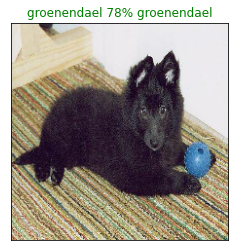

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels = val_labels,
          images = val_images,
          n=77)

Now we've hot one funtion to visualize our model predictions, let's make another to view our models top 10 predictions. 

This function will: 
* Take an imput of predictions probabilities array and a ground truth array and an integer 
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities index
  * Prediction probabilities values 
  * Prediction labels 
*  Plot the top 10 prediction probability values and labels, coloring the truth label green 

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label from sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label 
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 predictions confidence indexes
  top_10_pred_indexes =  pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values 
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels 
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot 
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  
  # Change color of the true label 
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

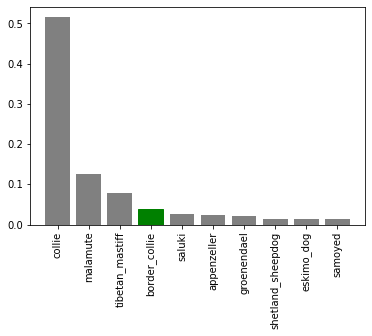

In [ ]:
plot_pred_conf(prediction_probabilities = predictions, labels = val_labels, n=9)

Now we've got some function to help us visualize our prediction and evaluate our model, let's check out a few.

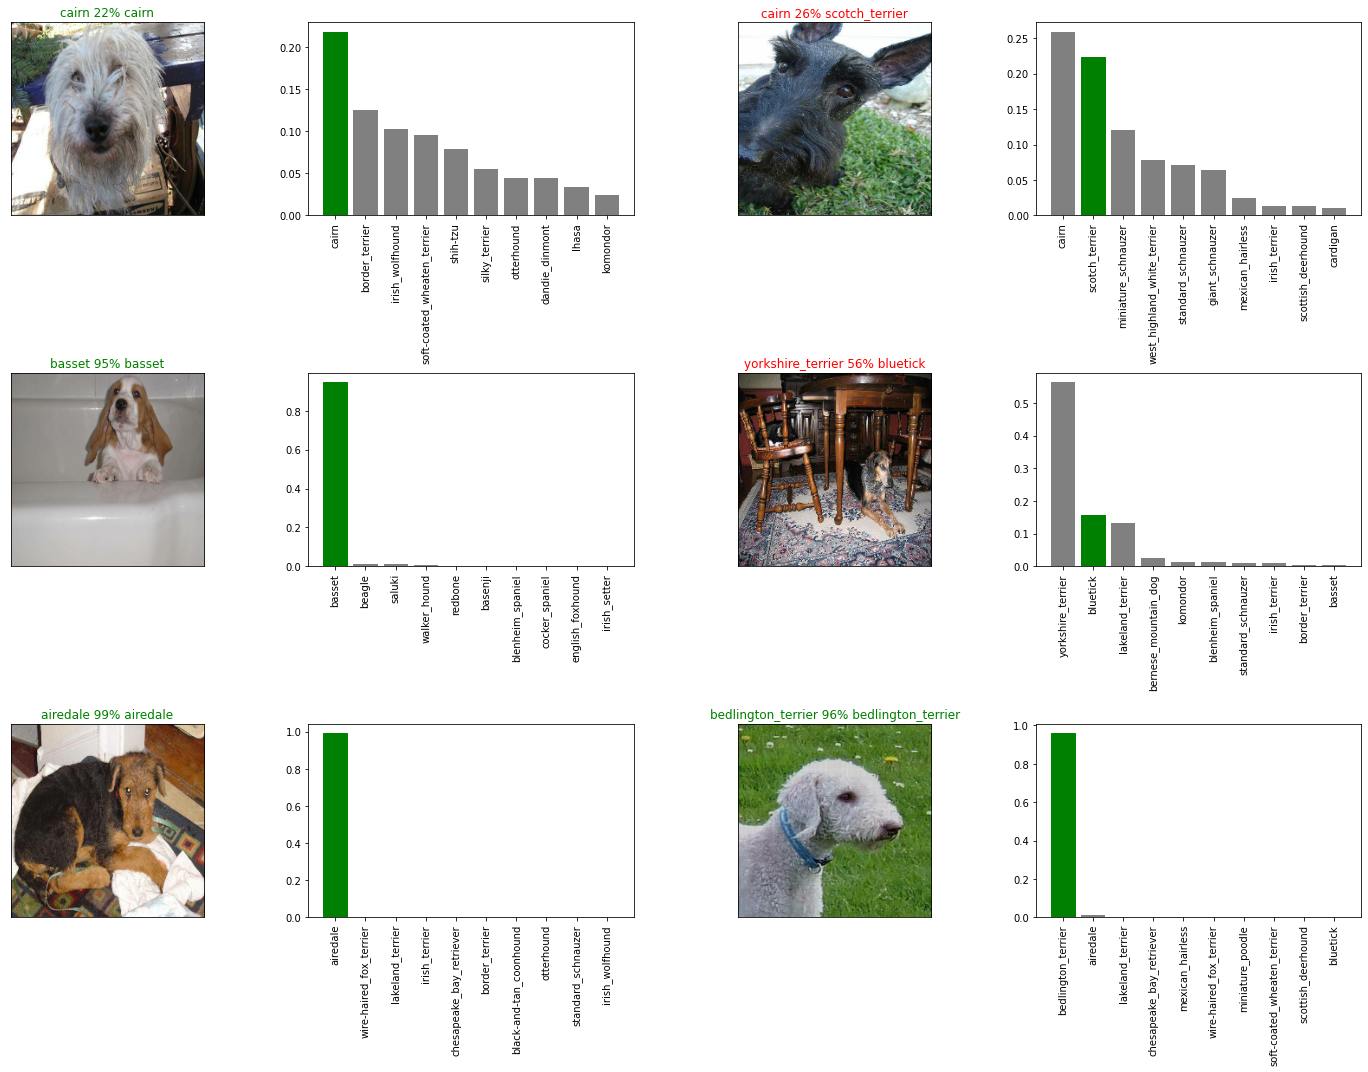

In [ ]:
# Let's check out a few predictions and their different values 
i_multiplier = 0 
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (10*num_cols, 5*num_rows)) 
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities = predictions,
            labels = val_labels, 
            images = val_images, 
            n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions, 
                 labels = val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()

## Saving and reloading a trained model 

In [ ]:
# Create a function to save a model 
def save_model(model, suffix = None):
  """"
  Saves a given model in a models directory and appends a suffix (string)
  """
  # Create a model Directory pathname with current time 
  modeldir = os.path.join("content/drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # Save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path 

In [ ]:
# Create a function to load a trained model 
def load_model(model_path):
  """"
  Loads a save model from a specified path.
  """
  print(f"Loading save model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects ={"KerasLayer":hub.KerasLayer}) 
  return model 

Now we've got functions to save and load a trained model, let's make sure they work!

In [ ]:
# Save our model trained on 1000 images 
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: content/drive/MyDrive/Dog Vision/models/20220103-12391641213584-1000-images-mobilenetv2-Adam.h5...


'content/drive/MyDrive/Dog Vision/models/20220103-12391641213584-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model("content/drive/MyDrive/Dog Vision/models/20220103-12391641213584-1000-images-mobilenetv2-Adam.h5")

Loading save model from: content/drive/MyDrive/Dog Vision/models/20220103-12391641213584-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model 
model.evaluate(val_data)

7/7 [==============================] - 1s 129ms/step - loss: 1.2742 - accuracy: 0.6400


[1.2741504907608032, 0.6399999856948853]

In [ ]:
# Evaluate the loaded model 
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 127ms/step - loss: 1.2742 - accuracy: 0.6400


[1.2741504907608032, 0.6399999856948853]

## Training a big dog model (on the full data)

In [ ]:
# Create a data batch with the full data set 
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a model for full model 
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Create full model callbacks 
full_model_tenorboard = create_tensorboard_callback()
# No Validation set when training on all the data, so we can't monitor validation accuracy 
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience = 3)

**Note:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the gpu we're using in the runtime has to load all of the images into memory.

In [ ]:
# Fit the full model to the full data 
full_model.fit(x=full_data, 
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tenorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 79s 216ms/step - loss: 1.3475 - accuracy: 0.6684
Epoch 2/100
320/320 [==============================] - 77s 239ms/step - loss: 0.4004 - accuracy: 0.8822
Epoch 3/100
320/320 [==============================] - 61s 191ms/step - loss: 0.2341 - accuracy: 0.9349
Epoch 4/100
320/320 [==============================] - 49s 153ms/step - loss: 0.1538 - accuracy: 0.9622
Epoch 5/100
320/320 [==============================] - 50s 155ms/step - loss: 0.1082 - accuracy: 0.9779
Epoch 6/100
320/320 [==============================] - 56s 176ms/step - loss: 0.0760 - accuracy: 0.9863
Epoch 7/100
320/320 [==============================] - 51s 159ms/step - loss: 0.0585 - accuracy: 0.9917
Epoch 8/100
320/320 [==============================] - 61s 190ms/step - loss: 0.0465 - accuracy: 0.9941
Epoch 9/100
320/320 [==============================] - 53s 164ms/step - loss: 0.0376 - accuracy: 0.9956
Epoch 10/100
320/320 [==============================] - 84s 263m

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: content/drive/MyDrive/Dog Vision/models/20220103-13051641215147-full-image-set-mobilenetv2-Adam.h5...


'content/drive/MyDrive/Dog Vision/models/20220103-13051641215147-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
# Load in the full model 
loaded_full_model = load_model("content/drive/MyDrive/Dog Vision/models/20220103-13051641215147-full-image-set-mobilenetv2-Adam.h5")

Loading save model from: content/drive/MyDrive/Dog Vision/models/20220103-13051641215147-full-image-set-mobilenetv2-Adam.h5


## Making prediction on the test dataset 

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into same format.

Luckily we create `create_data_batches()` earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames 
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels)
* Make a prediction array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# Load test image filenames 
test_path = "/content/drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog Vision/test/e6295bd4afe5ddf93a02cbd668819e9e.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e27567e188000db387977cdb9bbdcf82.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e137b0cd96051765c349377725c4696d.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e3a55cc9c91da472abbced51d98d6ff6.jpg',
 '/content/drive/MyDrive/Dog Vision/test/dd7fbb397a4968d9ae54d1d7b7a35ae6.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e63da7cff68f6a5e452bb73cdbd93ad3.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e7feb64da6aae1ef8e62453f6660d0c5.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e4729bf465eac43afb6b04687d4703c3.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e1f9be3ecf0409189486c786ff4bd65a.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e715a411098c046cac90c3facfa58c77.jpg']

In [ ]:
# Create test data batch 
test_data =  create_data_batches(test_filenames, test_data=True)

Creating test data batches...


**Note:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run (about an ~1hr)

In [ ]:
# Make predictions on the test data batch using the loaded full model 
test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 220s 671ms/step


In [ ]:
# Save predictions (Numpy array) to csv file (for access later)
np.savetxt("content/drive/MyDrive/Dog Vision/pred_array.csv", test_predictions, delimiter = ",")

In [ ]:
# Load predictions (NumPy array) from csv file 
test_predictions = np.loadtxt("content/drive/MyDrive/Dog Vision/pred_array.csv", delimiter=",")

In [ ]:
test_predictions[:10]

array([[2.50796806e-09, 2.84373258e-09, 7.81667508e-11, ...,
        1.32767949e-04, 1.78638508e-08, 1.57565114e-10],
       [9.12505206e-13, 6.61604010e-15, 2.66533062e-09, ...,
        1.25018344e-12, 8.75096523e-11, 3.96103452e-13],
       [5.42795497e-09, 4.31677059e-08, 2.82773662e-08, ...,
        7.75095821e-10, 2.95683021e-05, 9.03470294e-08],
       ...,
       [4.13013595e-07, 2.37993270e-09, 3.47718826e-10, ...,
        3.79388708e-11, 1.87601090e-09, 7.21167874e-12],
       [4.19031885e-08, 7.76462662e-13, 2.62087454e-08, ...,
        1.33970157e-09, 6.04092470e-11, 1.51192751e-07],
       [3.68042130e-08, 3.95532807e-09, 3.23993832e-10, ...,
        1.76480111e-08, 1.27726686e-04, 1.04152171e-08]])

In [ ]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle 

Looking at the Kaggle sample submission, we find that it wants our models prediction probability outputs in a DataFrame with an ID and a column for eacho different dog breed.

To get the data in this format we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed 
* Add data to the id column by extracting the test image ID's from their filepath 
* Add data (the prediction probabilities to each of the dog breed columns. 
* Export the DataFrame as a CSV submit it to Kaggle.

In [ ]:
# Create a pandas DataFarme with empty columns 
preds_df = pd.DataFrame(columns=["id"]+ list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test image Id's to predictions DataFrame 
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e6295bd4afe5ddf93a02cbd668819e9e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e27567e188000db387977cdb9bbdcf82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e137b0cd96051765c349377725c4696d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e3a55cc9c91da472abbced51d98d6ff6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,dd7fbb397a4968d9ae54d1d7b7a35ae6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add the prediction probab ilities to each dog breed column 
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e6295bd4afe5ddf93a02cbd668819e9e,2.50797e-09,2.84373e-09,7.81668e-11,3.8239e-11,3.61647e-10,3.64017e-07,5.72408e-11,9.28545e-05,2.22358e-07,1.84968e-11,1.02562e-09,5.77309e-11,2.05583e-09,4.15794e-10,1.39834e-07,8.11065e-10,2.58952e-10,1.75851e-09,3.02169e-08,2.07887e-08,1.066e-10,1.65101e-08,3.25939e-10,1.87951e-12,1.30856e-09,4.99383e-11,7.90645e-11,4.00485e-09,2.8036e-08,6.30641e-10,1.37888e-10,1.96805e-10,1.11086e-09,1.75638e-10,1.12561e-09,2.6944e-10,3.50633e-06,3.36499e-08,2.37125e-09,...,1.51597e-09,8.85809e-11,1.17611e-10,7.48283e-11,1.06307e-10,4.06955e-13,1.18283e-08,1.82857e-11,2.14056e-10,0.000147866,7.46639e-06,3.51336e-10,1.71473e-10,0.000114548,3.34084e-08,1.22612e-11,1.38008e-10,9.91012e-08,1.61475e-10,3.39644e-08,5.563e-10,5.09958e-07,1.0888e-08,6.64117e-09,5.09902e-10,1.78132e-07,5.68743e-09,2.39518e-10,3.44393e-12,1.95662e-10,2.71121e-08,2.36439e-07,6.5631e-06,5.7859e-09,6.46404e-09,5.07101e-09,1.0562e-13,0.000132768,1.78639e-08,1.57565e-10
1,e27567e188000db387977cdb9bbdcf82,9.12505e-13,6.61604e-15,2.66533e-09,3.38279e-15,2.20028e-11,2.36583e-10,1.23903e-11,3.25534e-06,4.13405e-13,8.19502e-10,5.15559e-13,6.08388e-10,9.95953e-12,1.95476e-11,6.65514e-13,3.8896e-13,3.65476e-12,1.68974e-12,2.19511e-12,2.33673e-14,6.09257e-13,2.34558e-14,5.50684e-14,2.1859e-13,1.85009e-13,1.03247e-14,1.0556e-10,8.71122e-05,4.95087e-12,3.39672e-06,1.8045e-12,7.02298e-14,9.92978e-13,5.57595e-11,1.91845e-14,7.65237e-13,6.39983e-08,8.31113e-09,3.36058e-13,...,6.9374e-12,1.83776e-08,3.53994e-14,2.01898e-14,1.09496e-09,5.24868e-13,0.999906,2.61946e-11,1.37338e-13,8.70128e-11,4.00344e-13,4.62641e-14,7.26641e-12,1.574e-12,7.33615e-11,1.92614e-07,6.05189e-10,3.0393e-13,4.58542e-13,4.36252e-09,3.04006e-11,2.25001e-09,8.37839e-10,6.06576e-11,1.72045e-13,7.34049e-14,2.55199e-13,1.00621e-14,3.87922e-16,1.85314e-13,9.1917e-11,5.95251e-10,1.36337e-13,7.69783e-14,3.10515e-13,1.15833e-11,1.98814e-11,1.25018e-12,8.75097e-11,3.96103e-13
2,e137b0cd96051765c349377725c4696d,5.42795e-09,4.31677e-08,2.82774e-08,7.67188e-09,4.66315e-08,2.91503e-09,3.9768e-08,1.93274e-07,5.96034e-10,1.05484e-07,4.44966e-11,8.23219e-08,1.34552e-07,2.22309e-10,1.08057e-09,5.97638e-09,1.54153e-06,7.20106e-11,1.07558e-07,5.02728e-10,3.7435e-10,3.87473e-09,2.46596e-09,1.68699e-07,1.65197e-10,3.83406e-09,1.62896e-09,5.66814e-08,1.87323e-10,1.29693e-07,5.09567e-09,1.85938e-09,1.73451e-08,0.000628269,3.51427e-10,6.21622e-11,1.39682e-07,5.29456e-09,3.24826e-07,...,3.70453e-10,6.10407e-08,1.50035e-08,5.6945e-08,0.00181656,3.72953e-07,1.93118e-06,0.000415518,6.25768e-10,1.42103e-09,2.69065e-11,4.4633e-09,6.00592e-10,8.57263e-09,4.81068e-08,3.84996e-06,9.61469e-08,1.1459e-09,2.16673e-10,0.997092,1.78049e-08,4.28735e-08,8.10518e-08,8.59605e-11,7.84602e-09,9.49913e-11,5.59928e-09,6.06841e-10,2.17889e-10,1.59969e-06,4.12239e-08,6.70224e-08,5.56538e-09,7.66339e-10,7.67735e-10,1.75918e-09,3.09989e-0

In [ ]:
# Save our prediction dataframe to CSV for submission to Kaggle 
preds_df.to_csv("drive/MyDrive/Dog Vision/full_model_predictions_submission_1_mobilienetV2.csv", index = False)

## Making predictions on custom images 

To make predictions on custom images, we'll:
* Get the filepath of our own images. 
* Turn the filepath into data batches using `create_data_batches()`. And since our costom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()`method. 
* Convert the prediction output probabilities to prediction  labels.
* Compare the prediction labels to the custom images.

In [ ]:
# Get custom image filepaths 
custom_path = "drive/MyDrive/Dog Vision/my-dog-photos/"
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_path

['drive/MyDrive/Dog Vision/my-dog-photos/WhatsApp Image 5.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/WhatsApp Image 4.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/WhatsApp Image 3.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/WhatsApp Image 2022-01-03 at 3.01.28 PM.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/WhatsApp Image 2022-01-03 at 2.59.32 PM.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/WhatsApp Image 210.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/WhatsApp Image 27.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/WhatsApp Image 9.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/WhatsApp Image 8.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/WhatsApp Image 6.jpeg']

In [ ]:
# Turn Custom images into batch datasets 
custom_data = create_data_batches(custom_image_path, test_data=True)
custom_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# Make predictions on the custom data 
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

(10, 120)

In [ ]:
# Get custom image prediction labels 
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['irish_terrier',
 'norfolk_terrier',
 'shih-tzu',
 'french_bulldog',
 'pomeranian',
 'silky_terrier',
 'silky_terrier',
 'airedale',
 'silky_terrier',
 'silky_terrier']

In [ ]:
# Get custom images (our unbatchify() function won't work sonce there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data 
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

ValueError: ignored

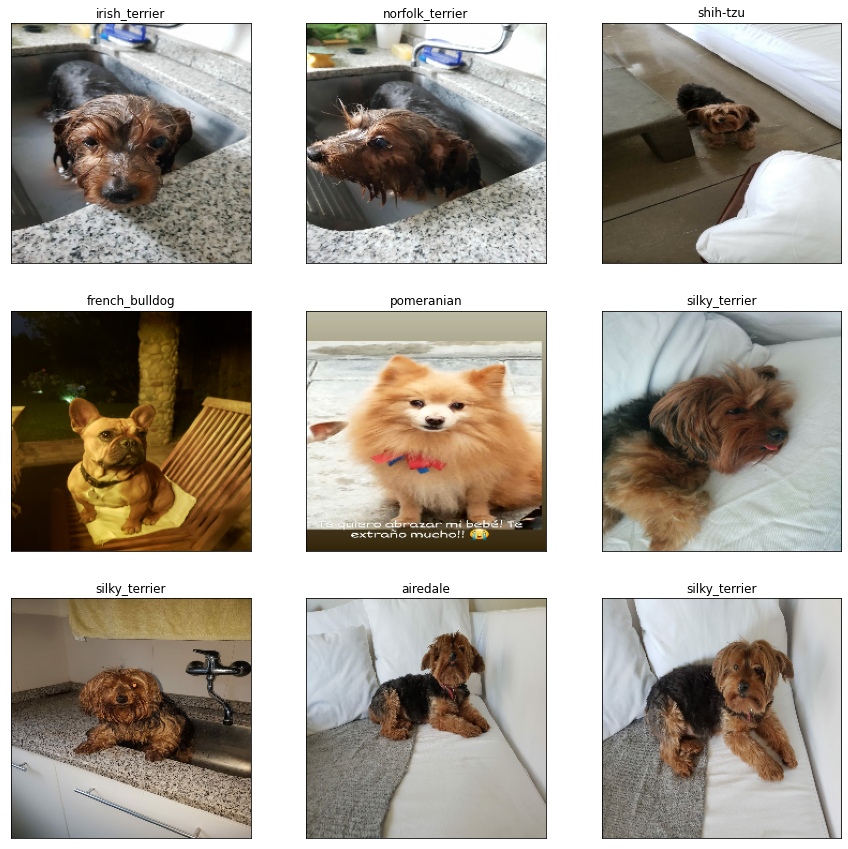

In [ ]:
# Check custom image predictions
plt.figure(figsize=(15, 15))
for i, image in enumerate(custom_images):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

In [ ]:
#return 'goodbye'when the function is called
def good_bye():
    return 'goodbye'



In [ ]:
good_bye()

'goodbye'